# Final Project - Management Information Reporting

1. Live report
    * Main performance indicators overall and by territory
    * Category and sub category performance
    * Summary of performance by year, quarter and month
2. Sales Analysis
    * By year, quarter and month
    * Weekly sales pattern
    * Seasonality analysis
    * Quarterly comparison
    * Performance bby region
    * Category Performance
    * Bike sales by region
3. Profitabbility Analysis
    * Overall profitability YOY
    * Comparing 2013 and 2014
    * Subcategory breakdown
    * Bike product breakdown
4. 2014 Q3 Strategy Recomemendations
    * Marketing
    * Product development
    * Next steps for data analysis

<!-- for advanced analysis, you could create a cluster analysis visual in PowerBI -->

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "./Resources/ManagementData.xlsx"
df = pd.read_excel(filepath)
df.head(5)

,OrderQty,UnitPrice,UnitPriceDiscount,TotalSale,ProductNameFull,CurrentStandardCost,CurrentListPrice,CatagoryName,SubCatagoryName,SaleDate,Territory,Area,RegtionCode,ProductProductionCost,Profit
0,1,2024.994,0.0,2024.994,"Mountain-100 Black, 42",1898.0944,3374.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1898.0944,126.8996
1,3,2024.994,0.0,6074.982,"Mountain-100 Black, 44",1898.0944,3374.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1898.0944,126.8996
2,1,2024.994,0.0,2024.994,"Mountain-100 Black, 48",1898.0944,3374.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1898.0944,126.8996
3,1,2039.994,0.0,2039.994,"Mountain-100 Silver, 38",1912.1544,3399.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1912.1544,127.8396
4,1,2039.994,0.0,2039.994,"Mountain-100 Silver, 42",1912.1544,3399.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1912.1544,127.8396


In [3]:
df.columns

Index(['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'TotalSale',
       'ProductNameFull', 'CurrentStandardCost', 'CurrentListPrice',
       'CatagoryName', 'SubCatagoryName', 'SaleDate', 'Territory', 'Area',
       'RegtionCode', 'ProductProductionCost', 'Profit'],
      dtype='object')

In [4]:
df = df.rename(columns = {
    'OrderQty': 'OrderQty', 
    'UnitPrice': 'UnitPrice', 
    'UnitPriceDiscount': 'UnitDiscount', 
    'TotalSale': 'TotalSale',
    'ProductNameFull': 'ProductName', 
    'CurrentStandardCost': 'StandardCost', 
    'CurrentListPrice': 'ListPrice',
    'CatagoryName': 'Category', 
    'SubCatagoryName': 'SubCategory', 
    'SaleDate': 'Date', 
    'Territory': 'Territory', 
    'Area': 'Area',
    'RegtionCode': 'Region', 
    'ProductProductionCost': 'ProductCost', 
    'Profit': 'Profit' 
})
df.head()

,OrderQty,UnitPrice,UnitDiscount,TotalSale,ProductName,StandardCost,ListPrice,Category,SubCategory,Date,Territory,Area,Region,ProductCost,Profit
0,1,2024.994,0.0,2024.994,"Mountain-100 Black, 42",1898.0944,3374.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1898.0944,126.8996
1,3,2024.994,0.0,6074.982,"Mountain-100 Black, 44",1898.0944,3374.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1898.0944,126.8996
2,1,2024.994,0.0,2024.994,"Mountain-100 Black, 48",1898.0944,3374.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1898.0944,126.8996
3,1,2039.994,0.0,2039.994,"Mountain-100 Silver, 38",1912.1544,3399.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1912.1544,127.8396
4,1,2039.994,0.0,2039.994,"Mountain-100 Silver, 42",1912.1544,3399.99,Bikes,Mountain Bikes,2011-05-31,Southeast,North America,US,1912.1544,127.8396


## 1. How sales on the bike product category are performing by region

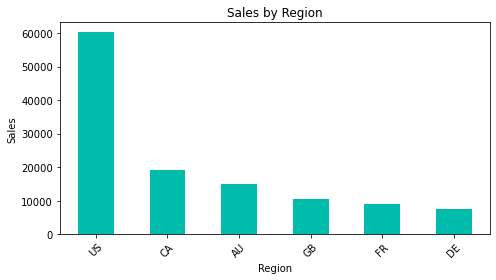

<Figure size 432x288 with 0 Axes>

In [5]:
region_sales = df["Region"].value_counts()

region_sales.plot(
    kind = "bar", 
    color = "#00BCAD",
    title = "Sales by Region",
    figsize = (7, 4)
    )
plt.xticks(rotation = 45)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()
plt.savefig("./Images/Sales_by_Region.png")

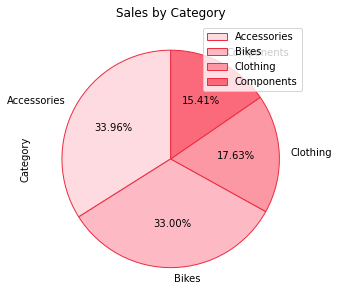

<Figure size 432x288 with 0 Axes>

In [6]:
category_sales = df["Category"].value_counts()
colors = ["#FDDBE1", "#FDBAC4", "#FC98A3", "#FB6A7A"]

category_sales.plot(
    kind = "pie",
    colors = colors,
    autopct = "%.2f%%", 
    figsize = (10, 5),
    title = "Sales by Category", 
    legend = "upper right",
    startangle = 90,
    wedgeprops = {"edgecolor": "#EE2D42"}
)
plt.show()
plt.savefig("./Images/Sales_by_Category.png")

AttributeError: 'Rectangle' object has no property 'autopct'

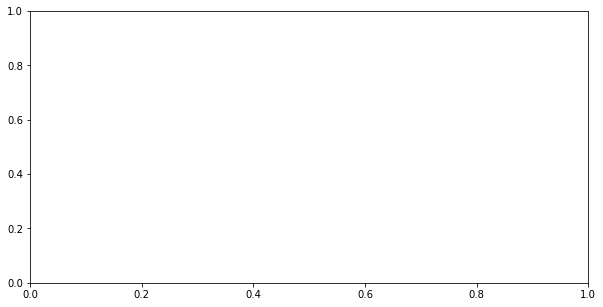

In [11]:
subcategory_sales = df["SubCategory"].value_counts()
# colors = ["#FDDBE1", "#FDBAC4", "#FC98A3", "#FB6A7A"]

subcategory_sales.plot(
    kind = "bar",
    # colors = colors,
    autopct = "%.2f%%", 
    figsize = (10, 5),
    title = "Sales by SubCategory", 
    legend = "upper right",
    startangle = 90,
    wedgeprops = {"edgecolor": "#EE2D42"}
)
plt.show()
plt.savefig("./Images/Sales_by_SubCategory.png")

## 2. Profitability year on year

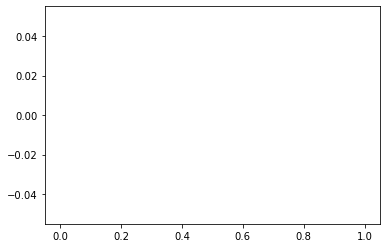

In [59]:
df = pd.DataFrame(columns=['Date'])

df["Date"] =pd.to_datetime(df["Date"])  # add this line before plotting

plt.hist(df["Date"]) 
plt.show()

In [60]:

x_value = df["Date"]
y_value = df["Profit"]

plt.plot(x_value, y_value)

KeyError: 'Profit'

## 3. Profitability this year against last year's figures

##  4. Breakdown by product subcategory

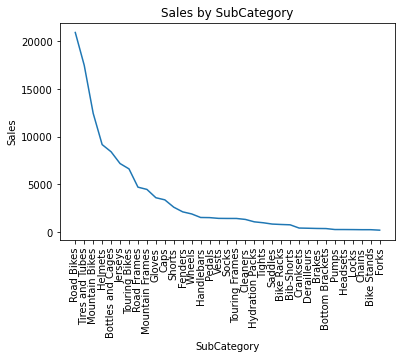

In [ ]:
subcat_sales = df['SubCategory'].value_counts()
plt.plot(subcat_sales)

# plt.plot(x_value, y_value)
plt.title("Sales by SubCategory")
plt.xlabel("SubCategory")
plt.ylabel("Sales")
plt.xticks(rotation = 90)
plt.show()

## 5. Recommendations Summary